## Predicting heart disease using machine learning

1.This notebook  looks into using various python-based machine learning and data science librarirs in as attempts to build a machine learning model  capable to whether or not someone has heart disease based in their medical atributes.

we're going to take following approch
1.problem definition 
2.data
3.evaluation
4.features
5.modelling
6.exprimentation

### 1.Problem definition

in a statement
> Given clinical parameters abouts a patient,can we predict whether or not they have heart disease?

### 2. Data

The original data came from the cleavland data from the UCL machine learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

there are also a version of ot avaliable on kaggle . 
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### 3. Evaluation 

> if we can reach 95% accuracy at predictiong whether or not a patient has heart disease during the proof of concepts ,we'll pursur the project.


### 4.Features

this is where you'll get different infomation about each of the feature in your data.

** Create data dictionary **
the following are the features we'll use to predict our target variable (heart disease or no heart disease).

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease


4.trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

5.chol - serum cholestoral in mg/dl

6.serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7.restecg - resting electrocardiographic results
      
      0: Nothing to note
     1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
     signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber

8.thalach - maximum heart rate achieved 

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

11.slope - the slope of the peak exercise ST segment
      
      0: Upsloping: better heart rate with excercise (uncommon)
      1: Flatsloping: minimal change (typical healthy heart)
      2: Downslopins: signs of unhealthy heart

12.ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

13.thal - thalium stress result
   
     1,3: normal
     6: fixed defect: used to be defect but ok now
     7: reversable defect: no proper blood movement when              excercising

14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
we're going to  pandas ,matplotlib, and numpy for data analysis and amnipulation.

In [1]:
# Import librarirs

#  regular EDA(Eploratory data analysis) and plotting libraries.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to apper inside the notebook
%matplotlib inline  

# model from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn. neighbors import KNeighborsClassifier

# model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Sat Feb  3 20:26:28 2024


## Load Data

In [2]:
df = pd.read_csv('6.1 heart-disease.csv')
df.shape #(rows,columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA)

the goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. what questions are you trying to solve?
2.what kind od data do we have and how do we treat different types?
3.what's missing from the data and how do we deal with it?
4.where are the outliers and why should you care about them ?
5.how can you add.change or remove feature to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#  let's find out how many of each class there

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

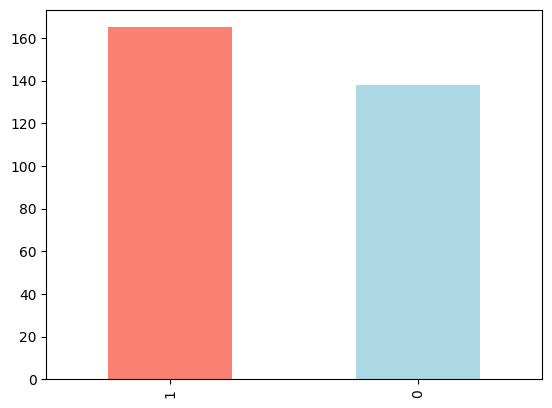

In [6]:
df['target'].value_counts().plot(kind = 'bar',color = ['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease Frequency According to Sex


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#  Campare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple baseline, we'll try to beat it with machine learning.

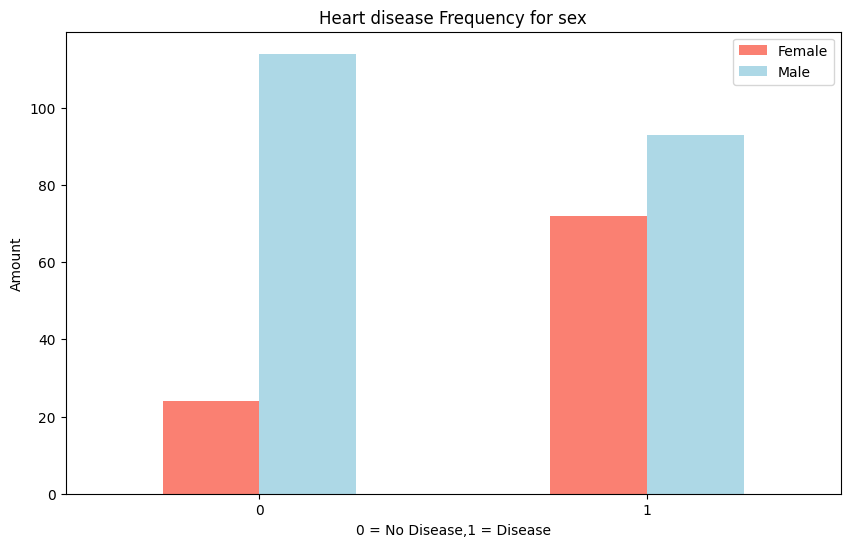

In [12]:
# .create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind = 'bar',
                                  figsize = (10,6),
                                  color = ['salmon','lightblue'])
plt.title('Heart disease Frequency for sex')
plt.xlabel('0 = No Disease,1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart rate for Heart Disease
Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

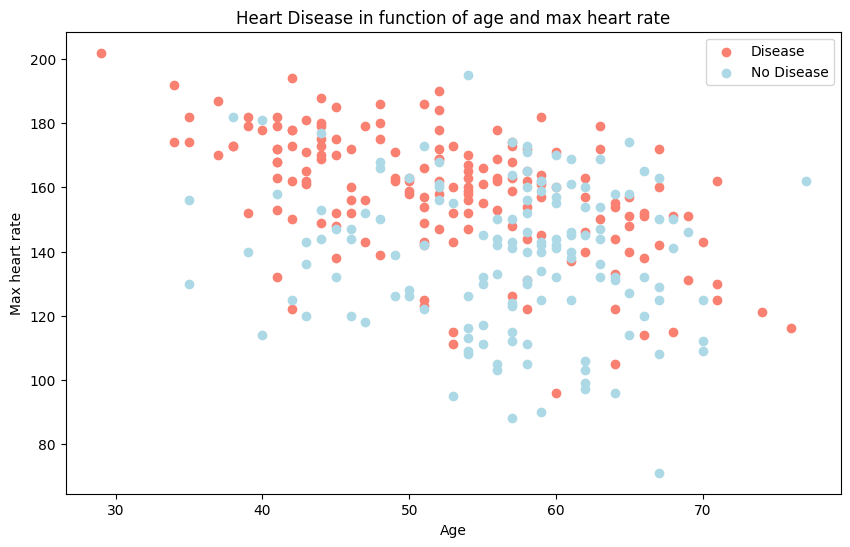

In [15]:
### Age vs. Max heart rate for heart disease
# create another figure

plt.figure(figsize = (10,6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],c = 'salmon')

# scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],c = 'lightblue')

## add some helpfull info
plt.title('Heart Disease in function of age and max heart rate')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Max heart rate');

##### What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

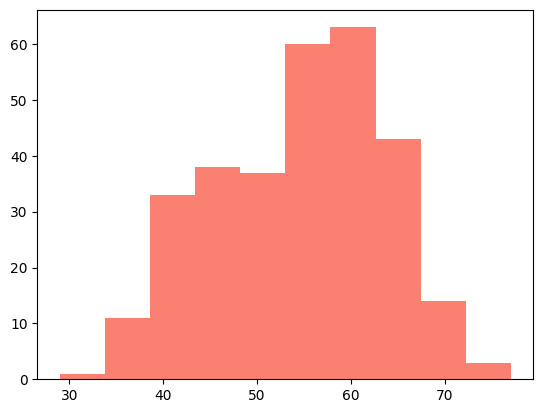

In [16]:
# check the distribution of the age columns with a histrogram
plt.hist(df.age,color = 'salmon');


We can see it's a normal distribution but slightly swaying to the right, which reflects in the scatter plot above.

Let's keep going.

## Heart disease frequency per chest pain type

Let's try another independent variable. This time, cp (chest pain).

We'll use the same process as we did before with sex.


3.cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease


In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


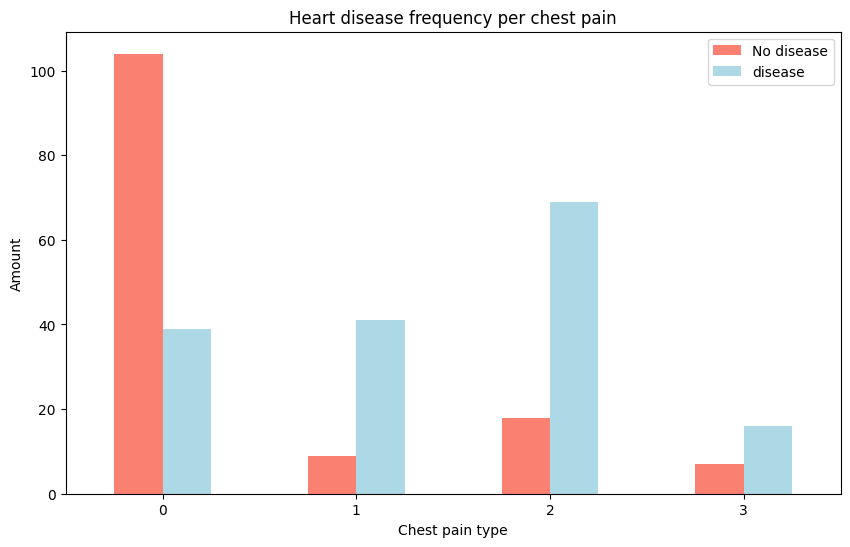

In [18]:
# ṃake the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind = 'bar',
                                 figsize = (10,6),
                                 color = ['salmon',
                                        'lightblue'])

# add some communication

plt.title('Heart disease frequency per chest pain')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease','disease'])
plt.xticks(rotation = 0);

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems even some medical professionals are confused by the term.

Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [19]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

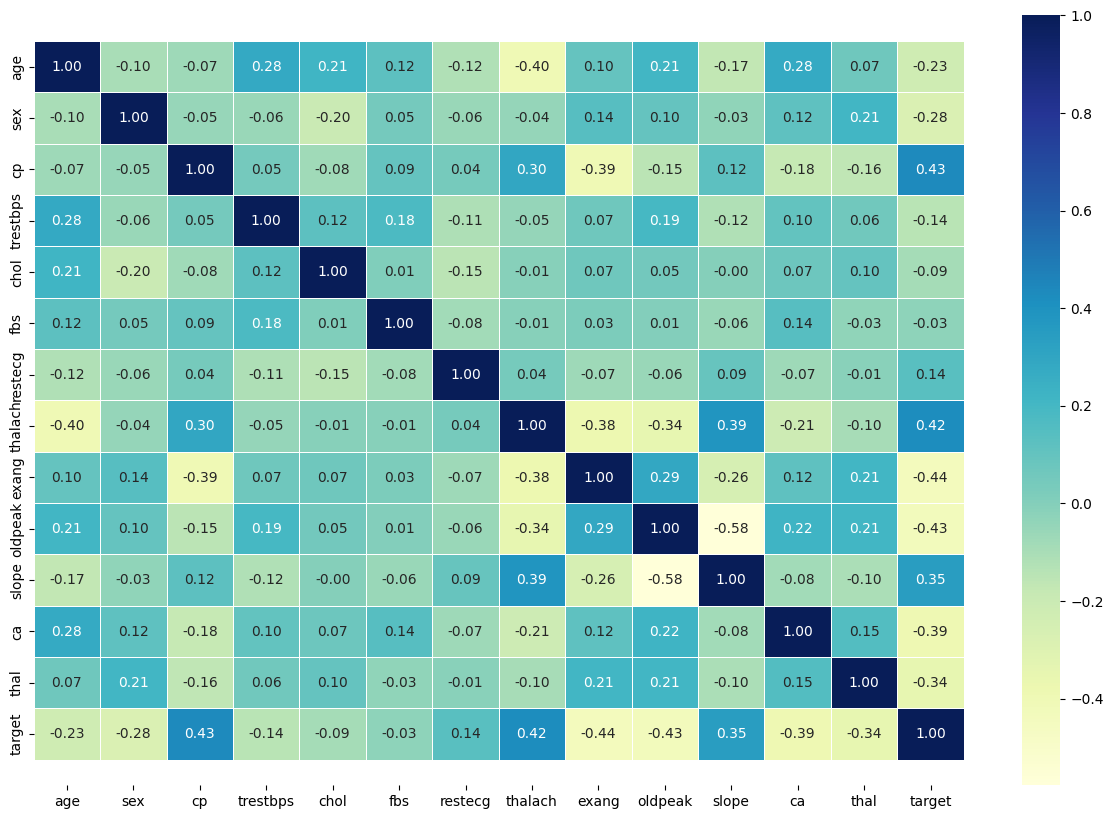

In [20]:
# lets male our correlation matrix little prettier

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                 fmt = '.2f',
                cmap = 'YlGnBu',
                );
bottom,top = ax.get_ylim()
ax.set_ylim(bottom +0.5,top-0.5)

 A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease

### 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [22]:
# split data into X & y
X = df.drop('target',axis = 1)
y = df['target']

In [23]:
X.shape,y.shape

((303, 13), (303,))

#### Training and test split
Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and a test set.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

In [24]:
# split data into train & test sets
np.random.seed(42)

# split into train & test set
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2)

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

now we got our data split into training and tests its time to build a machine learning model.
we'll train it (find the patterns) on the training set.
and we'll  test it (use the patterns) on the test set.

we're going to gtry 3 different machine learning models. 

1.Logistic Regression

2.K-Neighbour Classification

3.Random Forest Classifier

In [26]:
# PUT MODEL IN A DICTIONARY
models = {'Logistic Regression ': LogisticRegression(),
          'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}
# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning model.
    X_train : trainning data (no labels),
    X_test  : testing data (no labels).
    y_train : training labels.
    y_test : test labels
    """
    
    # set random seed(42)

    np.random.seed(42)
    #  make a dictonary to keep model score
    model_scores = {}
    # loop through models
    for name,model in models.items():
    #     fit models to the data
          model.fit(X_train,y_train)
    #     evaluate the model and append its score to model scores

          model_scores[name] = model.score(X_test,y_test)
    return model_scores


In [27]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test  = y_test)
model_scores

C:\Users\DELL\python3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression ': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparsion

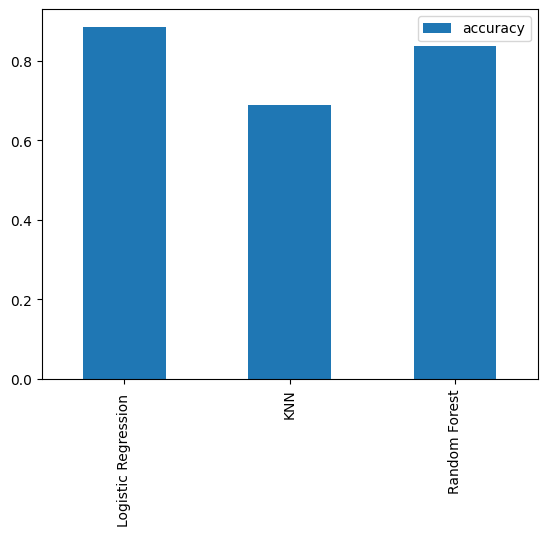

In [28]:

model_compare = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model...and weknow a model's first predictions aren't alwayss what we should based our next steps off.what should do?

Let's look at the following:

* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross - Validation
* Pricision
* Recall
* F1 -Score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [29]:
# lets tune KNN model
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup knn instance
knn  = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
#     fit the algorithm
    knn.fit(X_train,y_train)
    
#     update the train scores list
    train_scores.append(knn.score(X_train,y_train))
    
#     update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


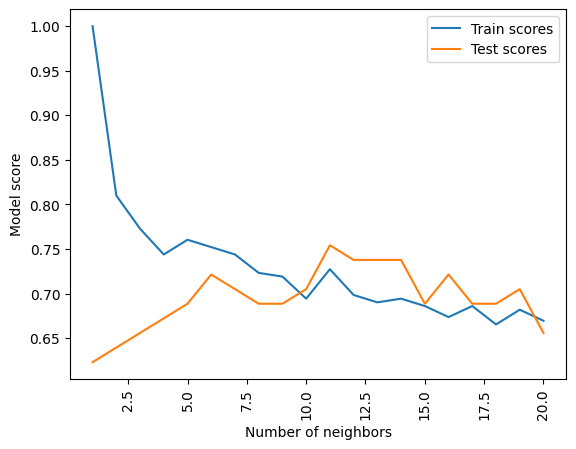

In [32]:
plt.plot(neighbors,train_scores,label = 'Train scores')
plt.plot(neighbors,test_scores,label = 'Test scores')
plt.ylabel('Model score')
plt.xlabel('Number of neighbors')
plt.legend()
plt.xticks(rotation = 90)
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSeachCV
We're going to tune:
  * LogisticRegression()
  * RandomForestClassifier()

....using RandomizedSearchCV


In [33]:
#  create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

now we've got hyperparameter gids setup for each of our models.lets tune them using RandomizedSeachCV...

In [34]:
## Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for Logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                            verbose = True)

# fit random hyperparameter search model for logisticregression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

now we've tuned logisticregression(),lets do the same for randomforestclassifier()...

In [37]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for randomforestclassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

# fit random hyperparameter search model for randomforestclassifier 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# evaluate the randomized search randomforestclassifier
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

since our logisticregression model provides the best scores so far,we'll try and improve them again using GridSearchCV..

In [40]:
# Different hyperparameters for our logisticregression model

log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid = log_reg_grid,
                               cv = 5,
                            verbose = True)
# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
# check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# evaluation the grid search gor logisticregressiom
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier beyond accuracy

* ROC and AUC score
* Confusion matrix
* classification report
* precision 
* recall 
* f1 score

In [43]:
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

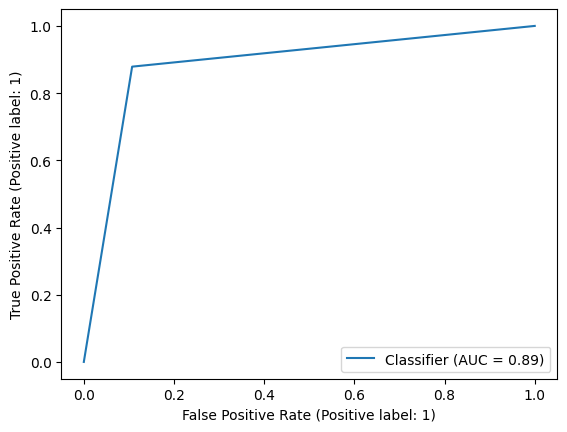

In [45]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_predictions(y_preds , y_test)

In [46]:
# confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


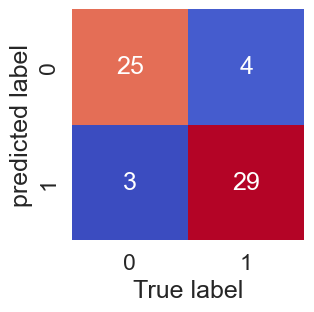

In [47]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn heatmap()
    """
    
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False,
                    cmap = 'coolwarm')
    plt.xlabel('True label')
    plt.ylabel('predicted label')
    
#     bottom,top = ax.get_ylim()
#     ax.set_ylim(bottom +0.5,top - 0.5)
    
    
plot_conf_mat(y_test, y_preds)    

now we've got a ROC curve an AUC metric and a confusion matrix lets get a classification report as well as cross validated precision & recall ....

In [48]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### calculate evluation metrics using cross validation

we're going to calculate precision recall,f1-score using cross validation and to do sowell 'll be using cross_val_score().

In [49]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# create a new classififer with best parameters
clf = LogisticRegression(C =  0.20433597178569418,
                        solver = 'liblinear')


In [51]:
# cross validation for accuracy
cv_acc = cross_val_score(clf,X,y,
                        cv = 5,scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [53]:
# cross validation precision
cv_precision= cross_val_score(clf,X,y,
                        cv = 5,scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [54]:
# cross validation recall
cv_recall= cross_val_score(clf,X,y,
                        cv = 5,scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

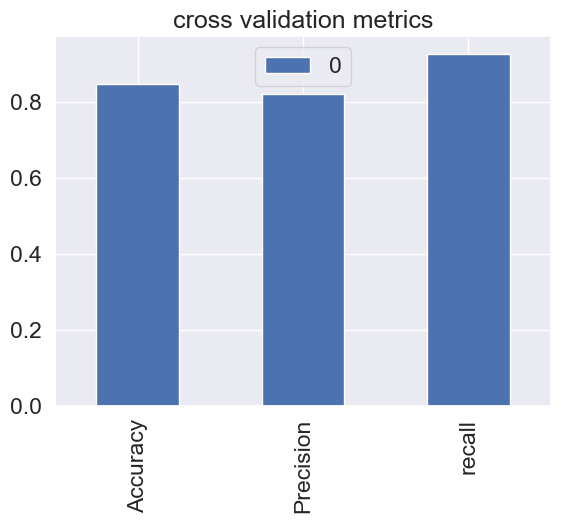

In [55]:
# Visualize cross validation metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_precision,
                          'recall':cv_recall}
                         ,index = [0])
cv_metrics.T.plot.bar(title = 'cross validation metrics');


Let's briefly go through each before we see them in action.

* Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Feature importance

feature importance is anothee as asking,"which feature contributed most to the outcomes of the model and how did they contribute?"

finding feature importance is different for each machine learning model.one way to fine feature importance is to search for (model name) feature importance.

lets find thr feature importance for our ligisticregression model...

In [56]:
# fit an istance of logisticregression 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')
clf.fit(X_train,y_train);

In [58]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [59]:
# match coef's of feature to columns
feature_dict  = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

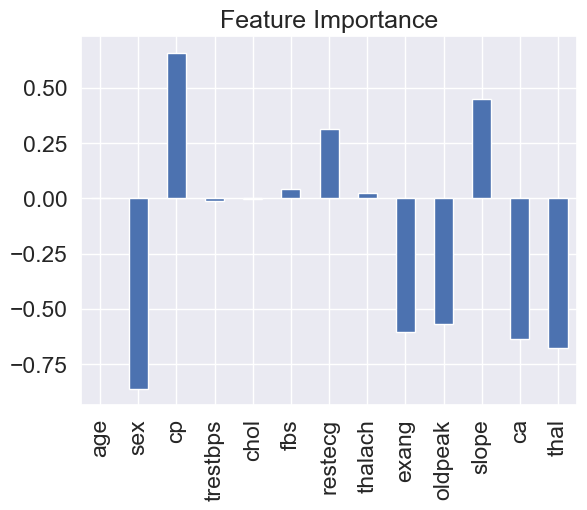

In [60]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = 'Feature Importance',legend = False);

In [61]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


you can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [62]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.


slope - the slope of the peak exercise ST segment

 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart

### Experimentation